In [131]:
import pandas as pd
from sklearn.preprocessing import Normalizer,StandardScaler,normalize
import scipy.cluster.hierarchy as sch 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn.decomposition import PCA

## 1.Data loading

In [96]:
data = pd.read_excel('Datasets/EastWestAirlines.xlsx')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## 2.Data Analysis

In [11]:
data.shape

(3999, 12)

In [12]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [13]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [14]:
data['Award?'].unique()

array([0, 1])

## 3.Data preprocessing

In [15]:
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [97]:
del data['ID#']

### Normalizing data

In [98]:
original_data = data
col = data.columns
norm = Normalizer()
data = norm.fit_transform(data)

In [99]:
data = pd.DataFrame(data,columns=col)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


## 4.Hierarical Clustering
### 4.1.Ploting DendoGram

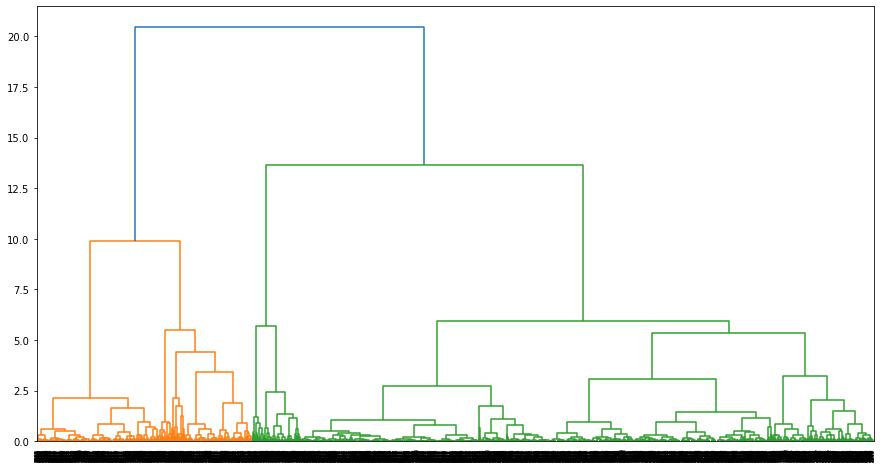

In [100]:
plt.figure(figsize=(15,8))
linked = sch.linkage(data,'ward')
den_graph = sch.dendrogram(linked,orientation='top',distance_sort='decending',show_leaf_counts=True)
plt.show()

### 4.2. building clusters using Hierarichal clustering

In [101]:
hie_clustering1 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')


In [102]:
data['hie_clus'] = hie_clustering1.fit_predict(data)
data.head(20)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hie_clus
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,4
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,2
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,2
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,2
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,3
5,0.921066,0.0,0.000056,0.000056,0.000056,0.000000,0.000000,0.000000,0.000000,0.389406,0.000000,2
6,0.948504,0.0,0.000034,0.000011,0.000011,0.306979,0.000279,0.000000,0.000000,0.078124,0.000000,2
7,0.922856,0.0,0.000044,0.000044,0.000044,0.232307,0.000177,0.011062,0.000044,0.306999,0.000044,2
8,0.999831,0.0,0.000007,0.000005,0.000002,0.003956,0.000097,0.008689,0.000027,0.015681,0.000002,4
9,0.963153,0.0,0.000028,0.000009,0.000009,0.261097,0.000257,0.010563,0.000028,0.063662,0.000009,2


In [103]:
original_data['hie_clus'] = data['hie_clus']
original_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hie_clus
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [104]:
original_data.groupby('hie_clus')[['Balance','Bonus_miles','Bonus_trans','cc1_miles']].mean()

,Balance,Bonus_miles,Bonus_trans,cc1_miles
hie_clus,,,,
0,5524.222707,584.532751,2.401747,1.000000
1,31066.514349,40266.935982,17.289183,3.200883
2,81201.080802,16350.149968,13.574014,2.115061
3,69569.894646,35743.675302,17.784111,3.326425
4,94957.590260,3524.928631,5.640638,1.141058


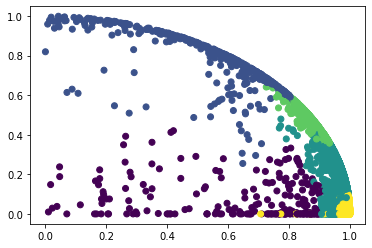

In [105]:
plt.scatter(data['Balance'],data['Bonus_miles'],c=data['hie_clus'])
plt.show()

In [106]:
del data['hie_clus']

## 5. Kmeans Clustering


### Calculating optimum value of K(no of clusters)

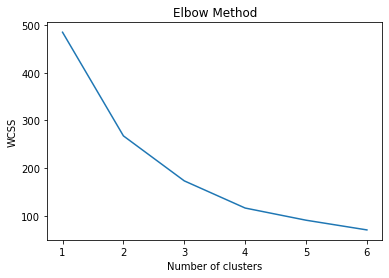

In [107]:
## Elbow Curve
wcss = []
for i in range(1, 7):
    k_means = KMeans(n_clusters=i,random_state=12)
    k_means.fit(data)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**optimum value is after which the decrease in WCSS is not significant**
**so here Optimal value is 3**

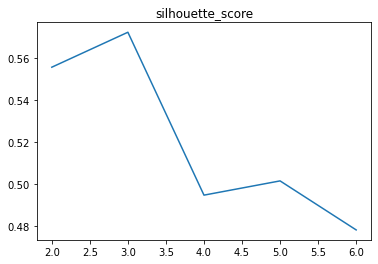

In [108]:
#using silhouette coeff
range_n_clusters = [2,3,4,5,6]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    k_means = KMeans(n_clusters=num_clusters)
    k_means.fit(data)
    cluster_labels = k_means.labels_
    silhouette_avg.append(silhouette_score(data, cluster_labels))
    
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg) 
plt.title('silhouette_score')
plt.show()


**optimal value should be a close as possible to 1
,so optimum value is 3**

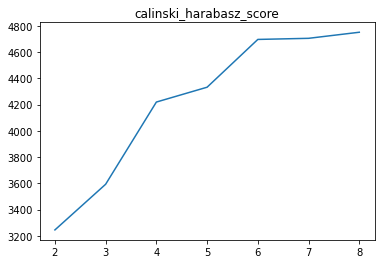

In [109]:
# using calinski_harabasz coeff

cal_score = []
range_n_clusters = [2,3,4,5,6,7,8]
for i in range_n_clusters:
    k_means = KMeans(n_clusters=i, random_state=1).fit(data)
    labels = k_means.labels_
    cal_score.append(calinski_harabasz_score(data, labels))
    
plt.plot(range_n_clusters,cal_score)
plt.title('calinski_harabasz_score')
plt.show()


**optimal value is for which the calinski_harabasz_score is highest i.e 6**

### since majority metric are sugesting 3 clusters we will go with 3 clusters if we are using Kmeans

### 5.1 Creating K means clusters using 6 clusters

In [110]:
k_means = KMeans(n_clusters=3)
data['Kmeans_clus'] = k_means.fit_predict(data)

In [111]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_clus
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,2
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,2
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,2
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,2
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,2


In [112]:
original_data['Kmeans_clus'] = data['Kmeans_clus']

In [113]:
original_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hie_clus,Kmeans_clus
0,28143,0,1,1,1,174,1,0,0,7000,0,4,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2


<AxesSubplot:ylabel='Kmeans_clus'>

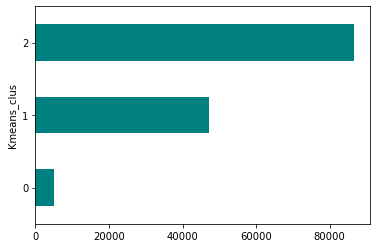

In [114]:
original_data.groupby('Kmeans_clus')['Balance'].mean().plot(kind='barh',color='teal')

In [115]:
original_data.groupby('Kmeans_clus')[['Balance','Bonus_miles','Bonus_trans','cc1_miles']].mean()

,Balance,Bonus_miles,Bonus_trans,cc1_miles
Kmeans_clus,,,,
0,5131.617886,869.394309,2.930894,1.008130
1,47062.690798,39388.652761,17.895706,3.319018
2,86696.132743,12337.173928,10.582029,1.798162


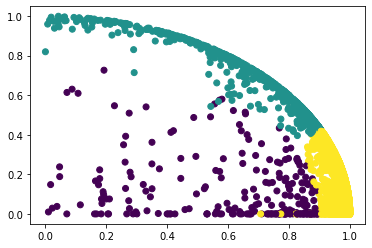

In [116]:
plt.scatter(data['Balance'],data['Bonus_miles'],c=data['Kmeans_clus'])
plt.show()

## 6.Building Clusters using DBSCAN

In [122]:
dbscan_data = original_data.iloc[:,:-2]
dbscan_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [126]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dbscan_data)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

### Reducing the dimensionality of the data to make it visualizable

In [129]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,-0.462763,-0.746462
1,-0.462302,-0.742107
2,-0.403204,-0.784825
3,-0.472266,-0.729998
4,1.053110,-0.187895


## Building the clustering model

In [144]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.05, min_samples =3).fit(X_principal)
labels = db_default.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
pd.Series(labels).unique()

array([ 0, -1,  1,  2,  3])

### DBSCAN Visualization

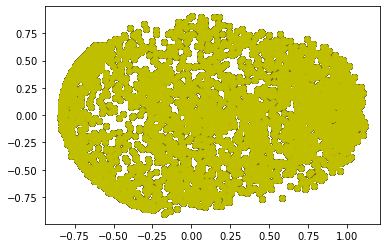

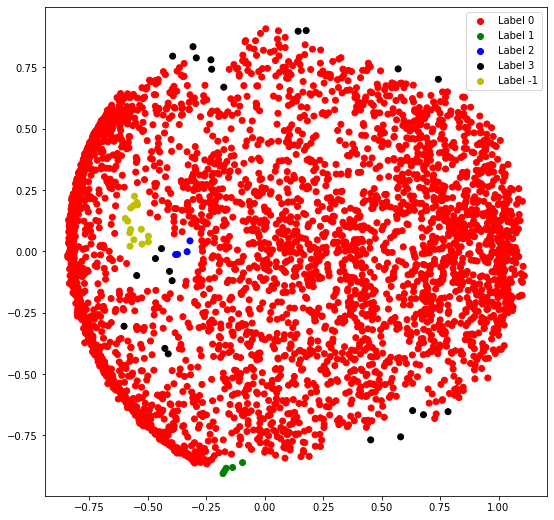

In [146]:

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
colours[-1] = 'k'

  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k,y), ('Label 0', 'Label 1', 'Label 2','Label 3', 'Label -1'))
  
plt.show()